# Evaluation of Graph Neural Network segment classifier

In [1]:
# Concurrency config
import os
os.environ['OMP_NUM_THREADS'] = '4'

In [2]:
# Notebook utils
from nb_utils import (get_test_data_loader, load_config, load_summaries,
                      load_model, apply_model, compute_metrics,
                      plot_train_history, draw_sample, plot_outputs_roc)

In [3]:
%matplotlib inline

In [4]:
# Config path
config_file = '../configs/segclf_med.yaml'

In [5]:
!cat $config_file

output_dir: ${SCRATCH}/heptrkx/results/gnnsegclf_med_011

trainer:
    name: gnn
    real_weight: 2.5   # 0.5 / 0.2
    fake_weight: 0.625 # 0.5 / 0.8

data:
    name: hitgraphs
    input_dir: ${SCRATCH}/heptrkx/data/hitgraphs_med_002
    n_train: 16384
    n_valid: 2048
    batch_size: 1
    n_workers: 4

model:
    name: 'gnn_segment_classifier'
    input_dim: 3
    hidden_dim: 64
    n_iters: 4
    loss_func: 'binary_cross_entropy'
    optimizer: 'Adam'
    learning_rate: 0.001
    lr_decay_schedule:
        - {start_epoch: 32, end_epoch: 48, factor: .1}
        - {start_epoch: 48, end_epoch: 64, factor: .01}

training:
    n_epochs: 64


In [6]:
config = load_config(config_file)
summaries = load_summaries(config)

In [7]:
summaries

,epoch,lr,train_loss,train_time,valid_acc,valid_loss,valid_time
0,0,0.001,0.170334,1381.911085,0.959829,0.091626,143.756512
1,1,0.001,0.077661,1358.651297,0.966634,0.074102,141.435814
2,2,0.001,0.063053,1359.794902,0.967032,0.074687,141.070867
3,3,0.001,0.057085,1360.927125,0.973883,0.057217,140.963215
4,4,0.001,0.053785,1378.530337,0.974248,0.058442,143.162202
5,5,0.001,0.051569,1358.761920,0.976371,0.053873,143.714318
6,6,0.001,0.049861,1361.784925,0.975669,0.055450,144.732579
7,7,0.001,0.048609,1360.486747,0.977361,0.052326,144.265212
8,8,0.001,0.047612,1356.717303,0.976509,0.053286,143.112206
9,9,0.001,0.046646,1358.179958,0.977193,0.050494,143.222446


## Plot the Training loss and accuracy

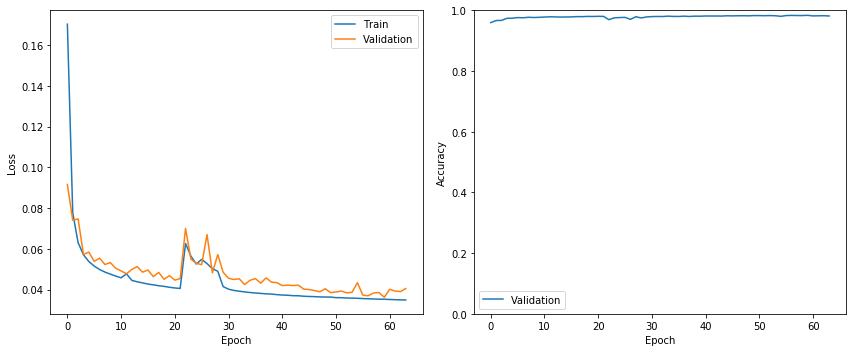

In [8]:
plot_train_history(summaries)

## Load the trained model

In [9]:
# Find the best epoch
best_summary = summaries.loc[[summaries.valid_loss.idxmin()]]
best_summary

,epoch,lr,train_loss,train_time,valid_acc,valid_loss,valid_time
59,59,0.001,0.035269,1372.003668,0.983738,0.03624,143.994759


In [10]:
# Load model from best epoch
model = load_model(config, reload_epoch=best_summary.epoch).eval()
model

GNNSegmentClassifier(
  (input_network): Sequential(
    (0): Linear(in_features=3, out_features=64, bias=True)
    (1): Tanh()
  )
  (edge_network): EdgeNetwork(
    (network): Sequential(
      (0): Linear(in_features=134, out_features=64, bias=True)
      (1): LayerNorm(torch.Size([64]), eps=1e-05, elementwise_affine=True)
      (2): Tanh()
      (3): Linear(in_features=64, out_features=64, bias=True)
      (4): LayerNorm(torch.Size([64]), eps=1e-05, elementwise_affine=True)
      (5): Tanh()
      (6): Linear(in_features=64, out_features=64, bias=True)
      (7): LayerNorm(torch.Size([64]), eps=1e-05, elementwise_affine=True)
      (8): Tanh()
      (9): Linear(in_features=64, out_features=1, bias=True)
      (10): Sigmoid()
    )
  )
  (node_network): NodeNetwork(
    (network): Sequential(
      (0): Linear(in_features=201, out_features=64, bias=True)
      (1): LayerNorm(torch.Size([64]), eps=1e-05, elementwise_affine=True)
      (2): Tanh()
      (3): Linear(in_features=64, out

## Load the test data set

In [11]:
n_test = 64
test_loader = get_test_data_loader(config, n_test=n_test)

## Evaluate the model on the test dataset

In [12]:
%%time
test_preds, test_targets = apply_model(model, test_loader)

CPU times: user 2min 18s, sys: 8.25 s, total: 2min 27s
Wall time: 37.6 s


In [13]:
threshold = 0.7
test_metrics = compute_metrics(test_preds, test_targets, threshold=threshold)

print('Test set results with threshold of', threshold)
print('Accuracy:  %.4f' % test_metrics.accuracy)
print('Precision: %.4f' % test_metrics.precision)
print('Recall:    %.4f' % test_metrics.recall)

Test set results with threshold of 0.7
Accuracy:  0.9865
Precision: 0.9610
Recall:    0.9820


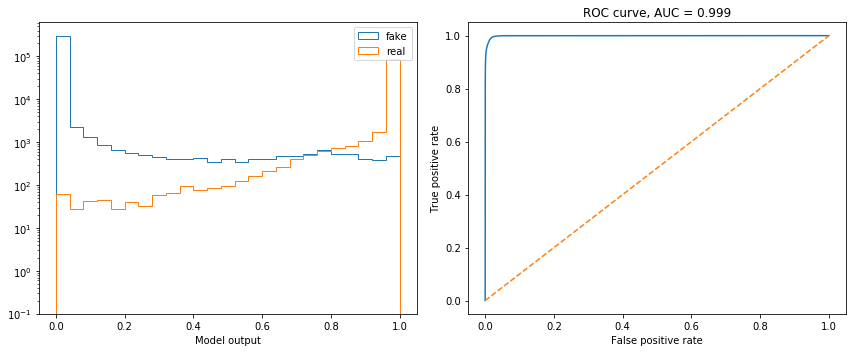

In [14]:
plot_outputs_roc(test_preds, test_targets, test_metrics)

## Visualize predictions

CPU times: user 2min 13s, sys: 1.16 s, total: 2min 14s
Wall time: 2min 14s


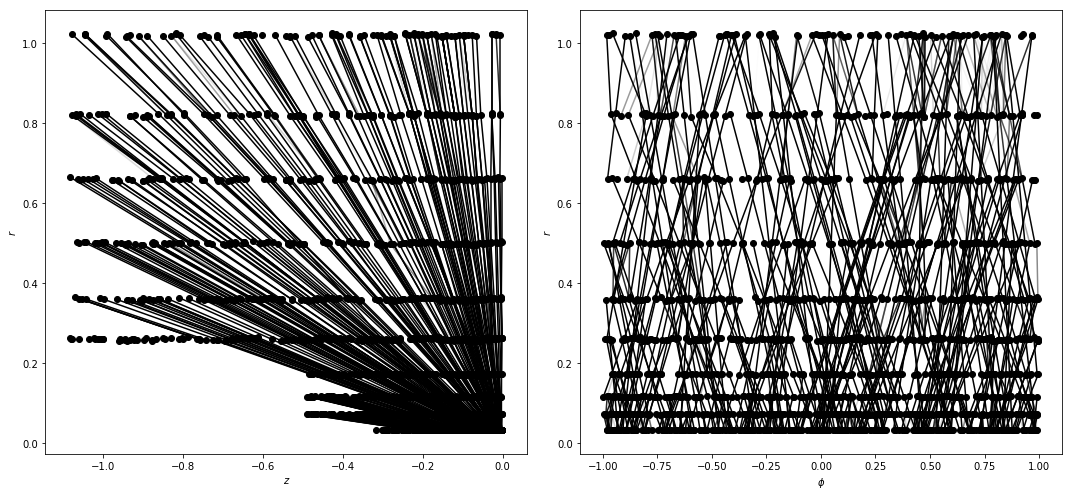

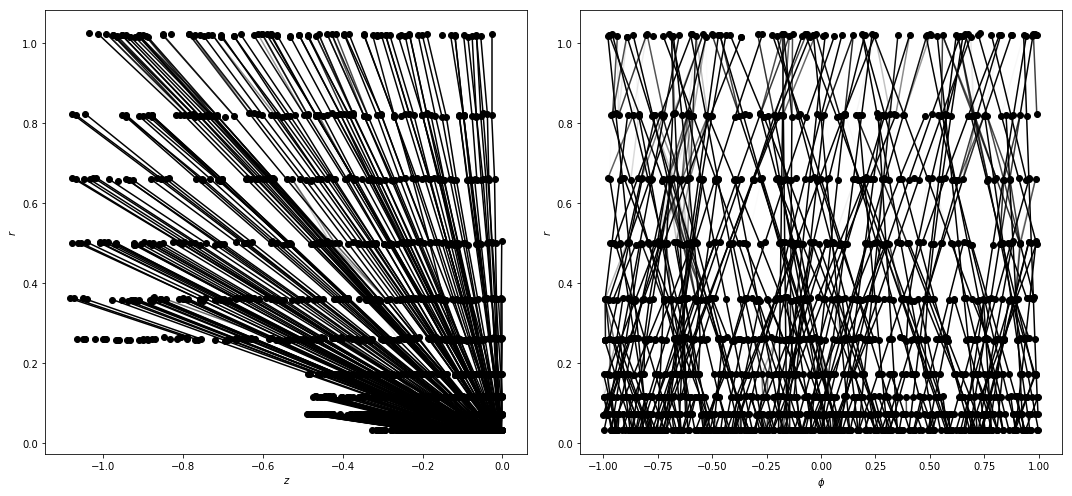

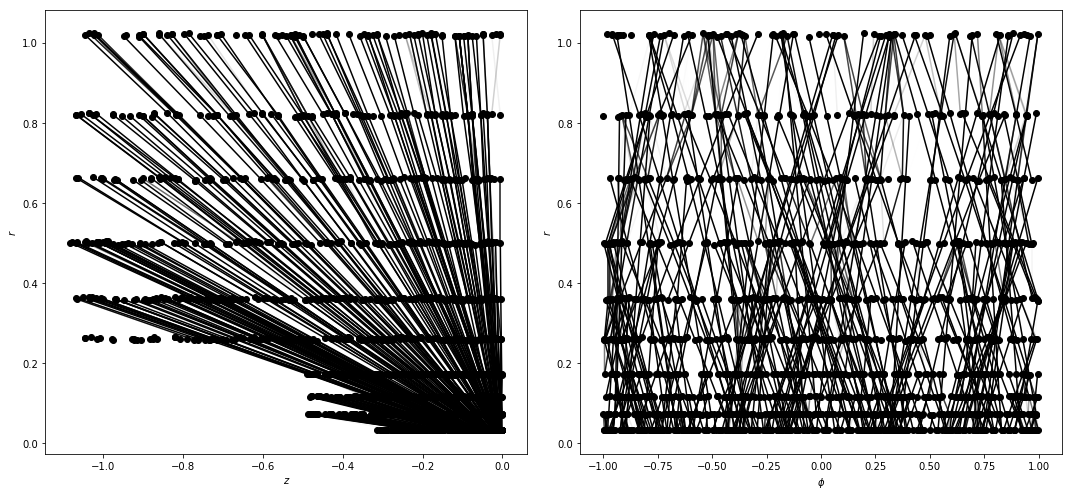

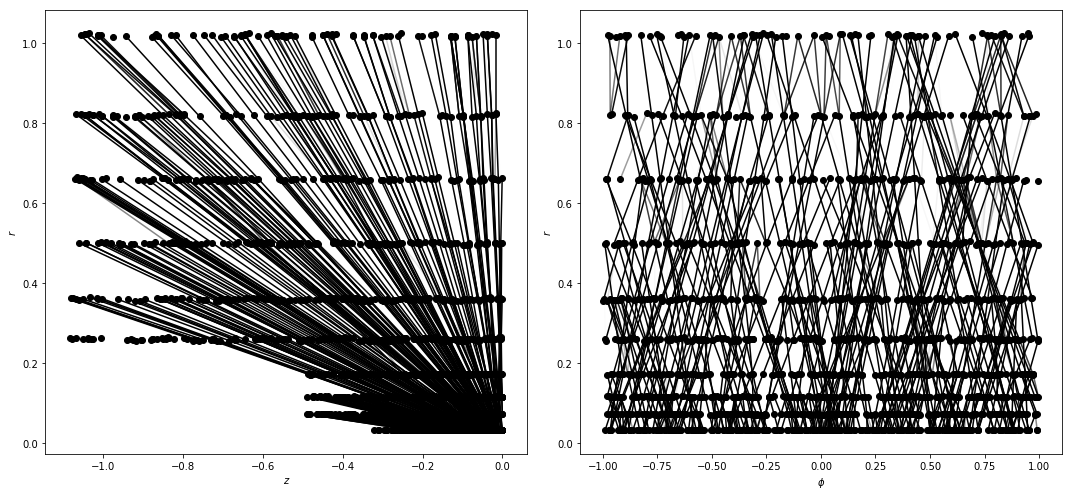

In [15]:
%%time

n_draw = 4
for i in range(n_draw):
    X, Ri, Ro, y = test_loader.dataset[i]
    pred = test_preds[i].numpy()
    draw_sample(X, Ri, Ro, pred, alpha_labels=True)

CPU times: user 1min 14s, sys: 380 ms, total: 1min 15s
Wall time: 1min 15s


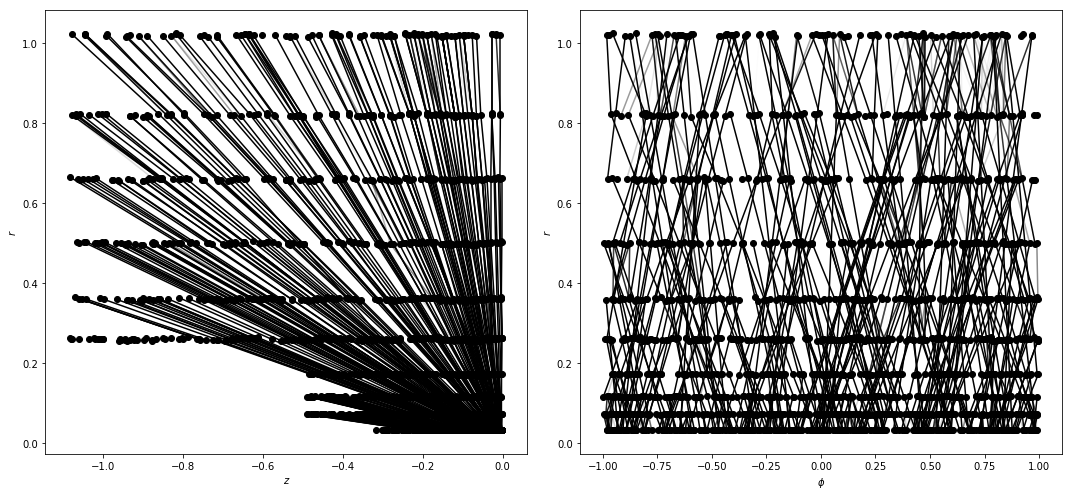

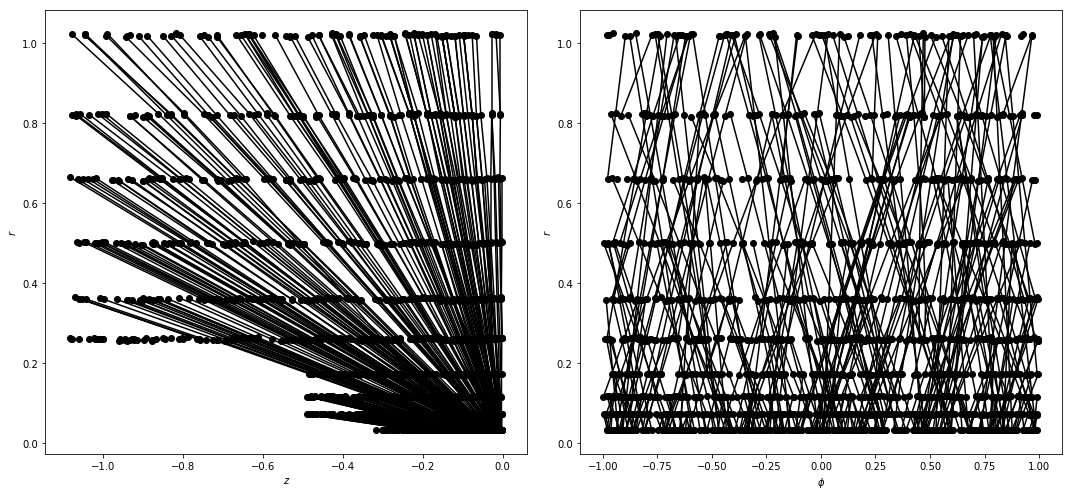

In [16]:
%%time

n_draw = 1
for i in range(n_draw):
    X, Ri, Ro, y = test_loader.dataset[i]
    pred = test_preds[i].numpy()
    draw_sample(X, Ri, Ro, pred)
    draw_sample(X, Ri, Ro, y)